# SENTIMENT ANALYSIS

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [6]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [7]:
# checking out the postive comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<Axes: xlabel='label'>

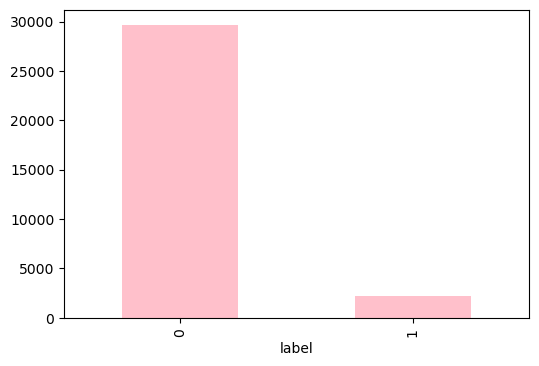

In [8]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

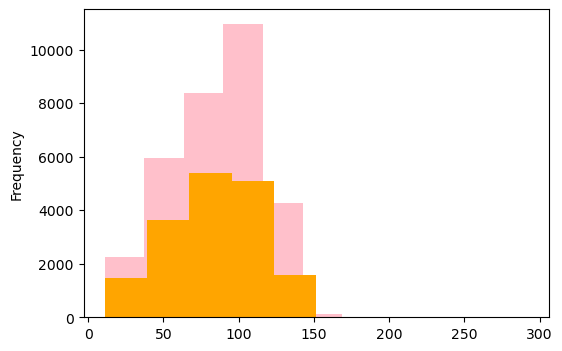

In [9]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [10]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [11]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

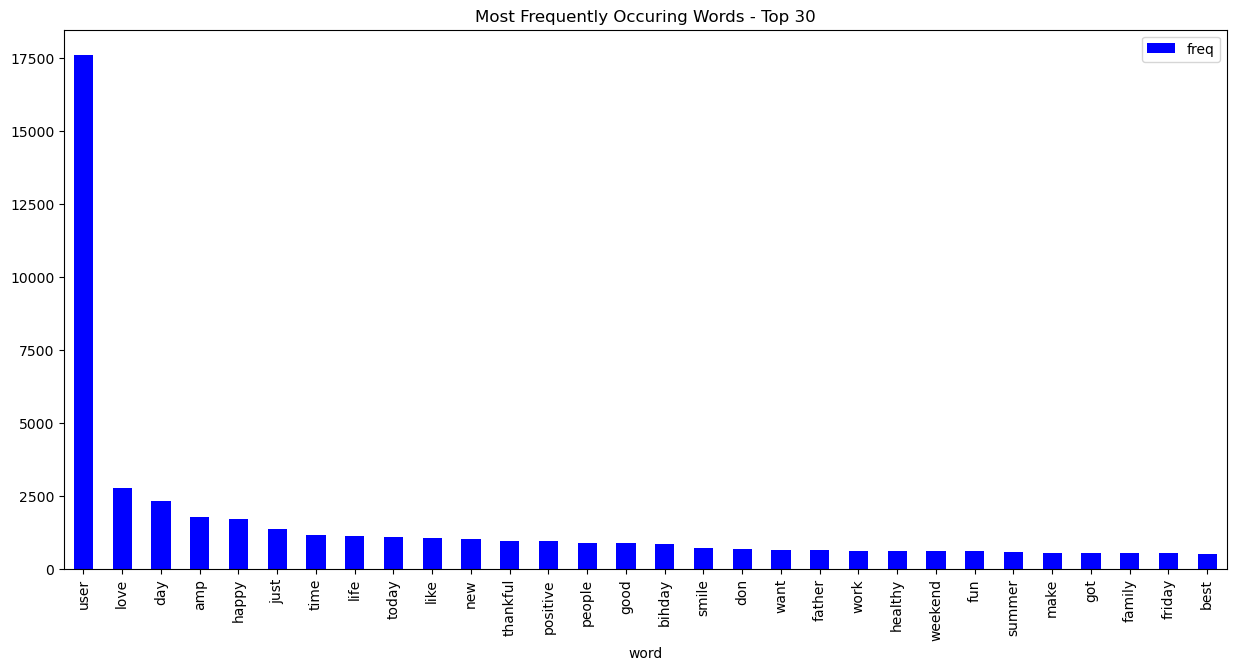

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'tweet' column to strings
train['tweet'] = train['tweet'].astype(str)

# Create CountVectorizer
cv = CountVectorizer(stop_words='english')

# Fit and transform the 'tweet' column
words = cv.fit_transform(train['tweet'])

# Sum the words
sum_words = words.sum(axis=0)

# Get words frequency
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]

words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


In [13]:
#pip install wordcloud


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

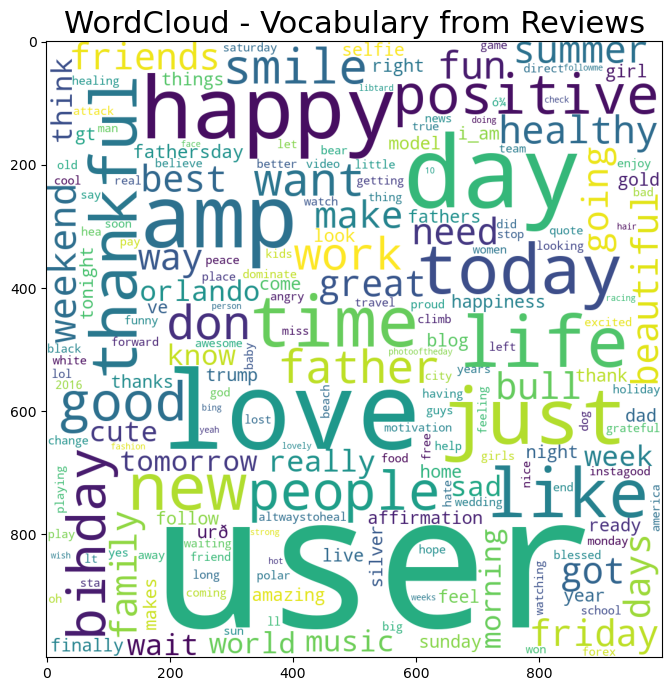

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

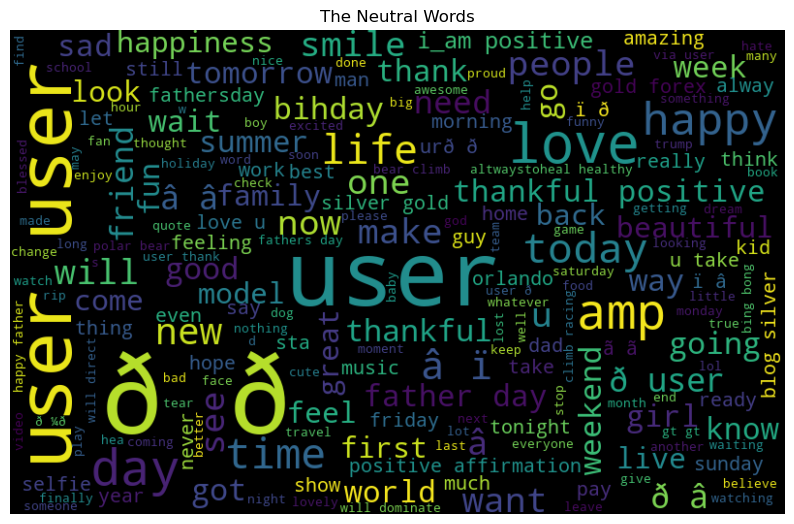

In [15]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

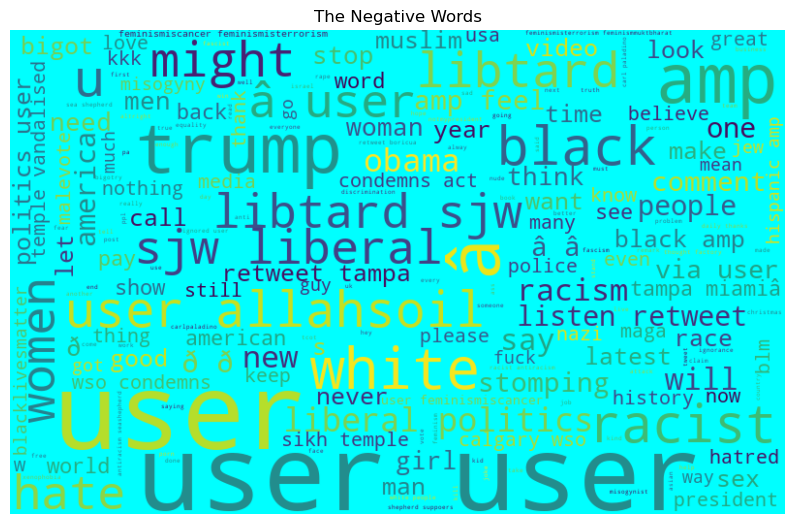

In [16]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [17]:
# collecting the hashtags
import regex as re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [18]:
# extracting hashtags from  tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

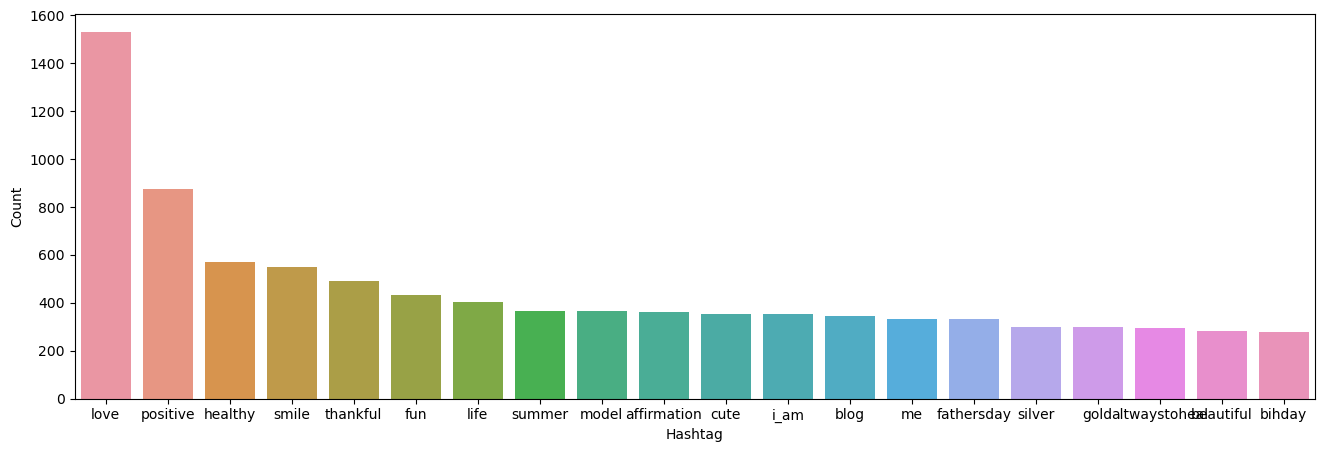

In [19]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

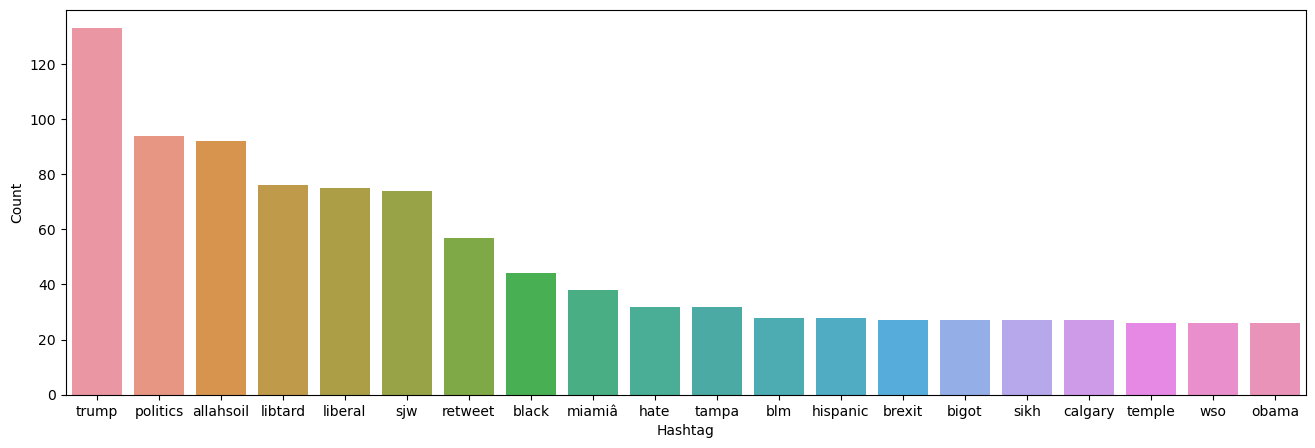

In [20]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [22]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
    tokenized_tweet,
    vector_size=200,  
    window=5,         
    min_count=2,
    sg=1,            
    hs=0,
    negative=10,      
    workers=2,       
    seed=34
)


model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6109634, 8411580)

In [23]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6514873504638672),
 ('podium', 0.6044255495071411),
 ('#wanderlust', 0.5954041481018066),
 ('#prosecco', 0.5932807326316833),
 ('enroute', 0.5867769718170166),
 ('coaching', 0.581095814704895),
 ('#restaurant', 0.5792304873466492),
 ('#boardgames', 0.5789425373077393),
 ('weekend...', 0.5783601403236389),
 ('ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»â\x9d¤ï¸\x8fâ\x9d¤ï¸\x8f',
  0.5783194899559021)]

In [24]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.7095028162002563),
 ('ways.', 0.7019459009170532),
 ('#merica', 0.6957483887672424),
 ('hundreds', 0.6925705671310425),
 ('behavior.', 0.6889532208442688),
 ('targeted', 0.6852600574493408),
 ('ownership', 0.6851702928543091),
 ('aol', 0.6834588050842285),
 ('spewing', 0.6828227043151855),
 ("society's", 0.6800577640533447)]

In [25]:
model_w2v.wv.most_similar(positive = "apple")

[('"mytraining"', 0.71647709608078),
 ('mytraining', 0.7057638764381409),
 ('training"', 0.6905561685562134),
 ('app,', 0.684298574924469),
 ('app', 0.6191492676734924),
 ('"my', 0.6017003655433655),
 ('ta', 0.5735886096954346),
 ('heroku', 0.5672972202301025),
 ('ios', 0.5654207468032837),
 ('humans.', 0.5516774654388428)]

In [26]:
model_w2v.wv.most_similar(negative = "hate")

[('#foodie', 0.05036436393857002),
 ('de', 0.04939105361700058),
 ('â\x9c\x88ï¸\x8f', 0.02504614181816578),
 ('#enjoy', 0.01810719259083271),
 ('@', 0.013998402282595634),
 ('hotel', 0.012850470840930939),
 ('#humpday', 0.01145974826067686),
 ('flying', 0.0074531096033751965),
 ('street,', 0.0038923618849366903),
 ('#staup', 0.003740355372428894)]

In [27]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

# tokenized_tweet' is a list of tokenized words for each tweet
tagged_data = [TaggedDocument(words=word_list, tags=[str(i)]) for i, word_list in enumerate(tokenized_tweet)]


In [28]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

In [29]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
train_corpus = []

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

for i in range(0, 31962):
    review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
    review = review.lower()
    review = review.split()
    
    # stemming and removing stopwords
    stemmed_review = [ps.stem(word) for word in review if word.lower() not in stop_words]

    # joining them back with space
    stemmed_review = ' '.join(stemmed_review)
    train_corpus.append(stemmed_review)

In [31]:
test_corpus = []

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

for i in range(0, 17197):
    review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
    review = review.lower()
    review = review.split()
    
    # stemming and removing stopwords
    stemmed_review = [ps.stem(word) for word in review if word.lower() not in stop_words]

    # joining them back with space
    stemmed_review = ' '.join(stemmed_review)
    test_corpus.append(stemmed_review)


In [61]:
# creating bag of words for training data

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [62]:
# creating bag of words for test data

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(17197, 2500)


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

# train_corpus is a list of strings
cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(train_corpus).toarray()

y = train.iloc[:, 1]

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (31962, 2500)
Shape of y: (31962,)


In [64]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Create and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_valid)

# Evaluate the model
training_accuracy = model.score(x_train, y_train)
validation_accuracy = model.score(x_valid, y_valid)
f1 = f1_score(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)

print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


C:\Users\vasud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.9679612865545868
Validation Accuracy: 0.9535727693655363
F1 Score: 0.5900552486187846
Confusion Matrix:
 [[7353   79]
 [ 292  267]]


In [66]:
print(type(loaded_model))


<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [67]:
import pickle
from sklearn.linear_model import LogisticRegression

# Assuming 'model' is your Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the CountVectorizer
with open('count_vectorizer.pkl', 'wb') as cv_file:
    pickle.dump(cv, cv_file)

# Load the logistic regression model
with open('logistic_regression_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load the CountVectorizer
with open('count_vectorizer.pkl', 'rb') as cv_file:
    cv = pickle.load(cv_file)


In [78]:
import pandas as pd

#'loaded_model' is the trained logistic regression model
#'x_test' contains the bag-of-words representation for the test data
predictions = loaded_model.predict(x_test)

# Create a DataFrame with 'id', 'tweet', 'prediction', and 'sentiment' columns
df_result = pd.DataFrame({'id': test['id'], 'tweet': test['tweet'], 'Prediction': predictions})

# Add a 'Sentiment' column based on the 'Prediction'
df_result['Sentiment'] = df_result['Prediction'].apply(lambda x: 'Negative' if x == 0 else 'Positive')

# Print or use the DataFrame as needed
df_result


,id,tweet,Prediction,Sentiment
0,31963,#studiolife #aislife #requires #passion #dedic...,0,Negative
1,31964,@user #white #supremacists want everyone to s...,0,Negative
2,31965,safe ways to heal your #acne!! #altwaystohe...,0,Negative
3,31966,is the hp and the cursed child book up for res...,0,Negative
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0,Negative
...,...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,0,Negative
17193,49156,feeling like a mermaid ð #hairflip #neverre...,0,Negative
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,0,Negative
17195,49158,"happy, at work conference: right mindset leads...",1,Positive


In [87]:
df_result_sample = df_result.sample(n=20, random_state=42)  

# Print the sampled DataFrame
df_result_sample

,id,tweet,Prediction,Sentiment
11123,43086,father's day hppy father's day dad luh yah a...,0,Negative
10381,42344,@user tooo much for @user can't wait for e...,1,Positive
3053,35016,#grillsquare wishes you father's day,0,Negative
6504,38467,@user @user like colorados aboion clinic shoot...,0,Negative
3501,35464,with my baby... #instalove #mamadeniÃ±a #madre...,0,Negative
1315,33278,starbucks makes my macchiato a small latte &gt...,0,Negative
10491,42454,fathersday #firstever #washable #blanket perf...,0,Negative
17115,49078,@user @user just got my vip ticket for july 1...,0,Negative
1710,33673,#childhood bull up: you will dominate your b...,0,Negative
14911,46874,you folks @user really screwed the pooch on th...,0,Negative
